In [1]:
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext
from scipy.interpolate import interp1d
import plotly.graph_objects as go
import plotly.io as pio
from scipy.optimize import fsolve
import pandas as pd
import webbrowser
import itertools
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
from scipy.constants import c,pi #speed of light #Pi
# Set global figure background color
plt.rcParams['figure.facecolor'] = 'white'

# Set global axes background color
plt.rcParams['axes.facecolor'] = 'white'

# Set global tick parameters (color, size, etc.)
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

# Set global label parameters (color, size, etc.)
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'

# Set global legend background color
plt.rcParams['legend.facecolor'] = 'white'


def load_csv(file_path):
    df = pd.read_csv(file_path, header=1, names=['wavelength', 'refractive_index'])
    wavelength = df['wavelength'].to_numpy()
    refractive_index = df['refractive_index'].to_numpy()
    return wavelength, refractive_index


def load_txt(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['wavelength', 'refractive_index'])
    wavelength = df['wavelength'].to_numpy()
    refractive_index = df['refractive_index'].to_numpy()
    return wavelength, refractive_index




In [2]:
#for GeO2-SiO2
lambda_array = np.array([0.365015, 0.404656, 0.435835, 0.467815, 0.479991, 0.508582, 0.546074, 0.578012, 0.589262, 0.643847, 
                0.852110, 0.894350, 0.920846, 1.002439, 1.012360, 1.01398, 1.03946, 1.12866, 1.19332, 1.3589, 
                1.3622, 1.4695, 1.52958, 1.693, 1.6932, 1.81307, 1.859, 1.97009, 2.325347, 2.373, 2.717, 
                2.764, 4.2369, 4.2809])

n_array = np.array([1.64605, 1.63393, 1.62697, 1.62137, 1.61956, 1.61585, 1.61192, 1.60918, 1.60832, 1.60481, 
           1.59692, 1.59591, 1.59529, 1.59377, 1.59354, 1.59356, 1.59313, 1.59180, 1.59095, 1.58905, 
           1.58902, 1.58794, 1.58731, 1.58579, 1.58567, 1.58460, 1.58415, 1.58306, 1.57936, 1.57895, 
           1.57493, 1.57433, 1.54955, 1.54838])
def paper_model(w_nm):
    temp = 0 
    w_um = w_nm/1000
    a = np.array([0.80686642,0.71815848,0.85416831])
    l = np.array([0.068972606,0.15396605,0.11841931*100])
    for i in range(3):
        ram = a[i]*w_um**2/(w_um**2-l[i]**2)
        temp += ram
    result  = np.sqrt(temp+1)
    return result

Fitting range 585.721 to 901.704, measured data range is from 4.58287e-07 to 1.6884e-06
[[ 1.29196675e-009 -3.38351627e-021  3.47085496e-033 -1.74409269e-045
   4.29636742e-058 -4.15471948e-071]
 [-3.38351627e-021  8.88209828e-033 -9.13276127e-045  4.59962666e-057
  -1.13552601e-069  1.10034002e-082]
 [ 3.47085496e-033 -9.13276127e-045  9.41248394e-057 -4.75135828e-069
   1.17556707e-081 -1.14152212e-094]
 [-1.74409269e-045  4.59962666e-057 -4.75135828e-069  2.40386675e-081
  -5.96058550e-094  5.80006900e-107]
 [ 4.29636742e-058 -1.13552601e-069  1.17556707e-081 -5.96058550e-094
   1.48113235e-106 -1.44420853e-119]
 [-4.15471948e-071  1.10034002e-082 -1.14152212e-094  5.80006900e-107
  -1.44420853e-119  1.41100938e-132]]


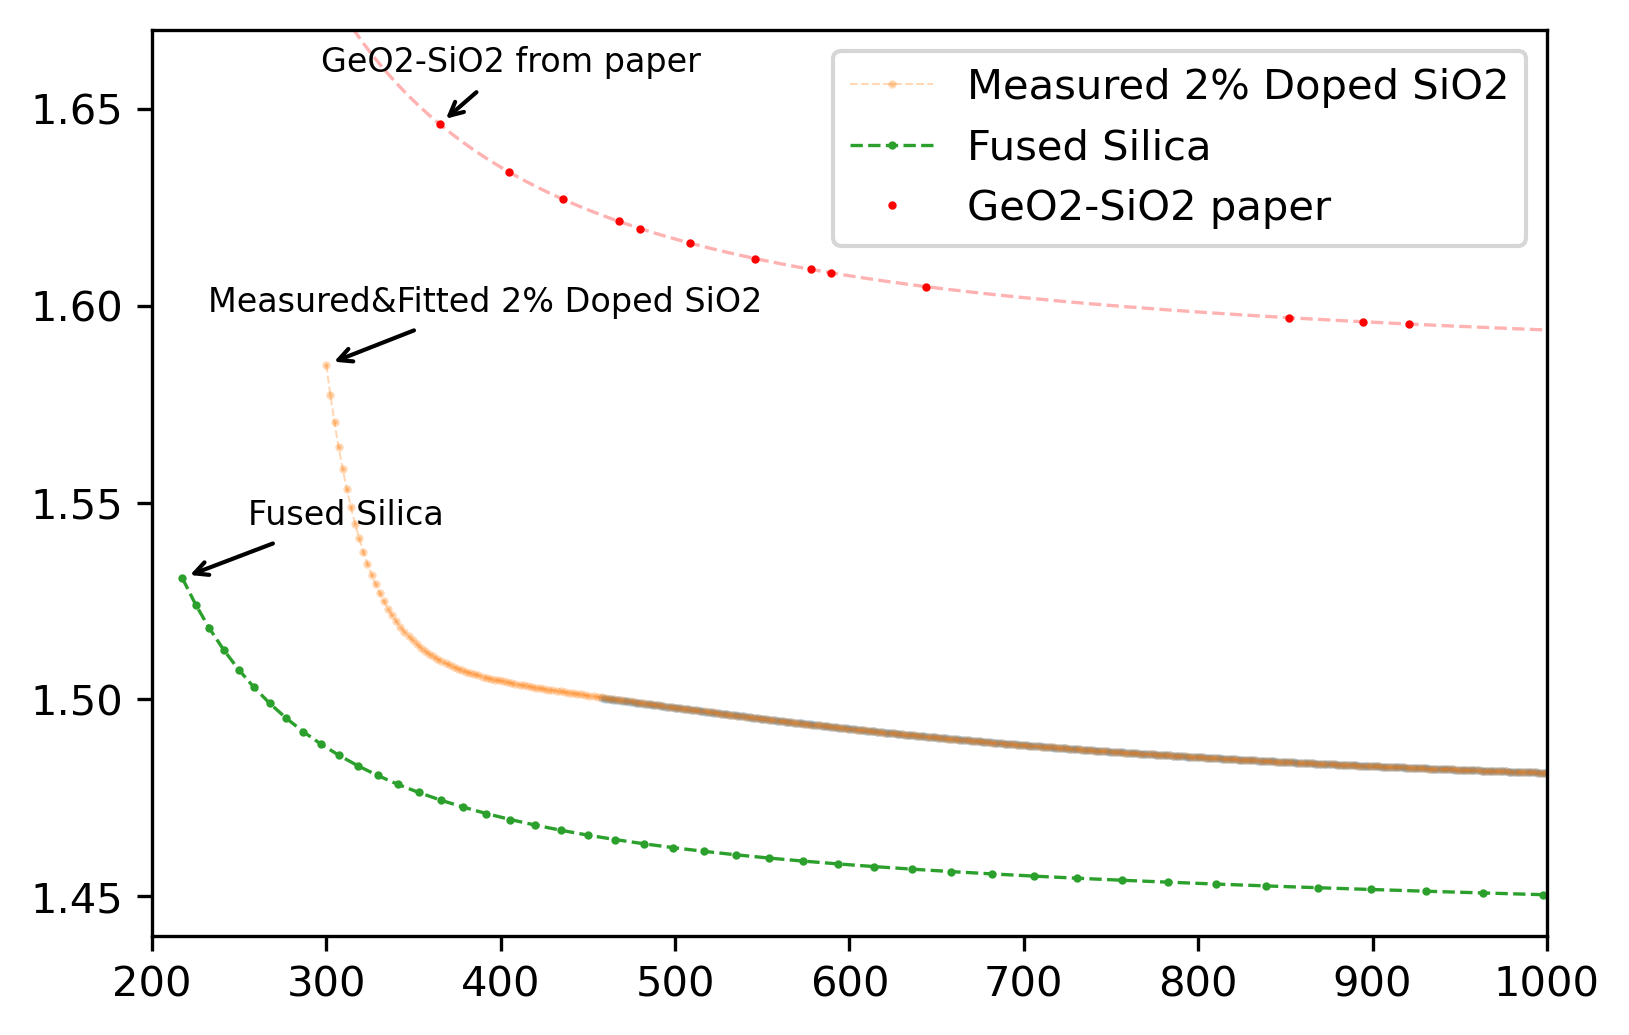

In [8]:
file_path = r'D:\Caltech\Simulation\HY_comsol_simulation\waveguide_for_photogalvanic\material\Fused Silica.csv'  
wavelength1, refractive_index1 = load_csv(file_path)

file_path = r'D:\Caltech\Simulation\HY_comsol_simulation\waveguide_for_photogalvanic\material\Ge-SiO2 (2% doping RTA) (Shijia-UCSB 2024a n 0.459-1.688 µm).txt'
wavelength2, refractive_index2 = load_txt(file_path)

#Fit and plot all three of them
def extended_cauchy_formula(lambda_m, A, B, C, D, E, F):
    return A + B / lambda_m**2 + C / lambda_m**4 + D / lambda_m**6 + E / lambda_m**8 + F / lambda_m**10

initial_guess = [1.5, 1e-18, 3e-25, 1e-36, 1e-45, 1e-54]
xi,xf = 80,280
print(f'Fitting range {wavelength2[xi]*1e9} to {wavelength2[xf]*1e9}, measured data range is from {wavelength2[0]} to {wavelength2[-1]}')
popt, pcov = curve_fit(extended_cauchy_formula, wavelength2[xi:xf], refractive_index2[xi:xf])
A, B, C, D, E, F = popt
w_nm_test = np.linspace(300, 1005, 300)
n_fitted = extended_cauchy_formula(w_nm_test*1e-9 , A, B, C, D, E, F)
wavelength1 = wavelength1*1000
wavelength2 = wavelength2 * 1e9
print(pcov)



plt.figure(dpi = 300)
plt.plot(wavelength2, refractive_index2, '--o', alpha=0.3, linewidth=1,markersize=1)
plt.plot(w_nm_test, n_fitted, '--o', label='Measured 2% Doped SiO2', alpha=0.3, linewidth=0.5,markersize=1)
plt.plot(wavelength1, refractive_index1, '--o', label='Fused Silica', linewidth=0.8,markersize=1)

plt.plot(lambda_array*1000, n_array, 'o', label='GeO2-SiO2 paper', markersize=1,color = 'red')
plt.plot(w_nm_test,paper_model(w_nm_test),'--',alpha = 0.3, linewidth = 0.8,color = 'red')
# Adding arrows and labels

points = [
    #{"x": wavelength2[0], "y": refractive_index2[0], "text": "Raw 2% Doped SiO2", "xytext": (wavelength2[0] + 150, refractive_index2[0] + 0.02)},
    {"x": w_nm_test[0], "y": n_fitted[0], "text": "Measured&Fitted 2% Doped SiO2", "xytext": (w_nm_test[0] + 250, n_fitted[0] + 0.02)},
    {"x": wavelength1[0], "y": refractive_index1[0], "text": "Fused Silica", "xytext": (wavelength1[0] + 150, refractive_index1[0] + 0.02)},
    {"x": lambda_array[0] * 1000, "y": n_array[0], "text": "GeO2-SiO2 from paper", "xytext": (lambda_array[0] * 1000 + 150, n_array[0] + 0.02)},
]

for point in points:
    plt.annotate(point["text"], xy=(point["x"], point["y"]), xytext=point["xytext"],
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=8, color='black', horizontalalignment='right', verticalalignment='top')

    
plt.xlim(200,1000)
plt.ylim(1.44,1.67)
plt.legend()

In [ ]:
# Generate the refractive index from 

Text(0, 0.5, 'refractive index')

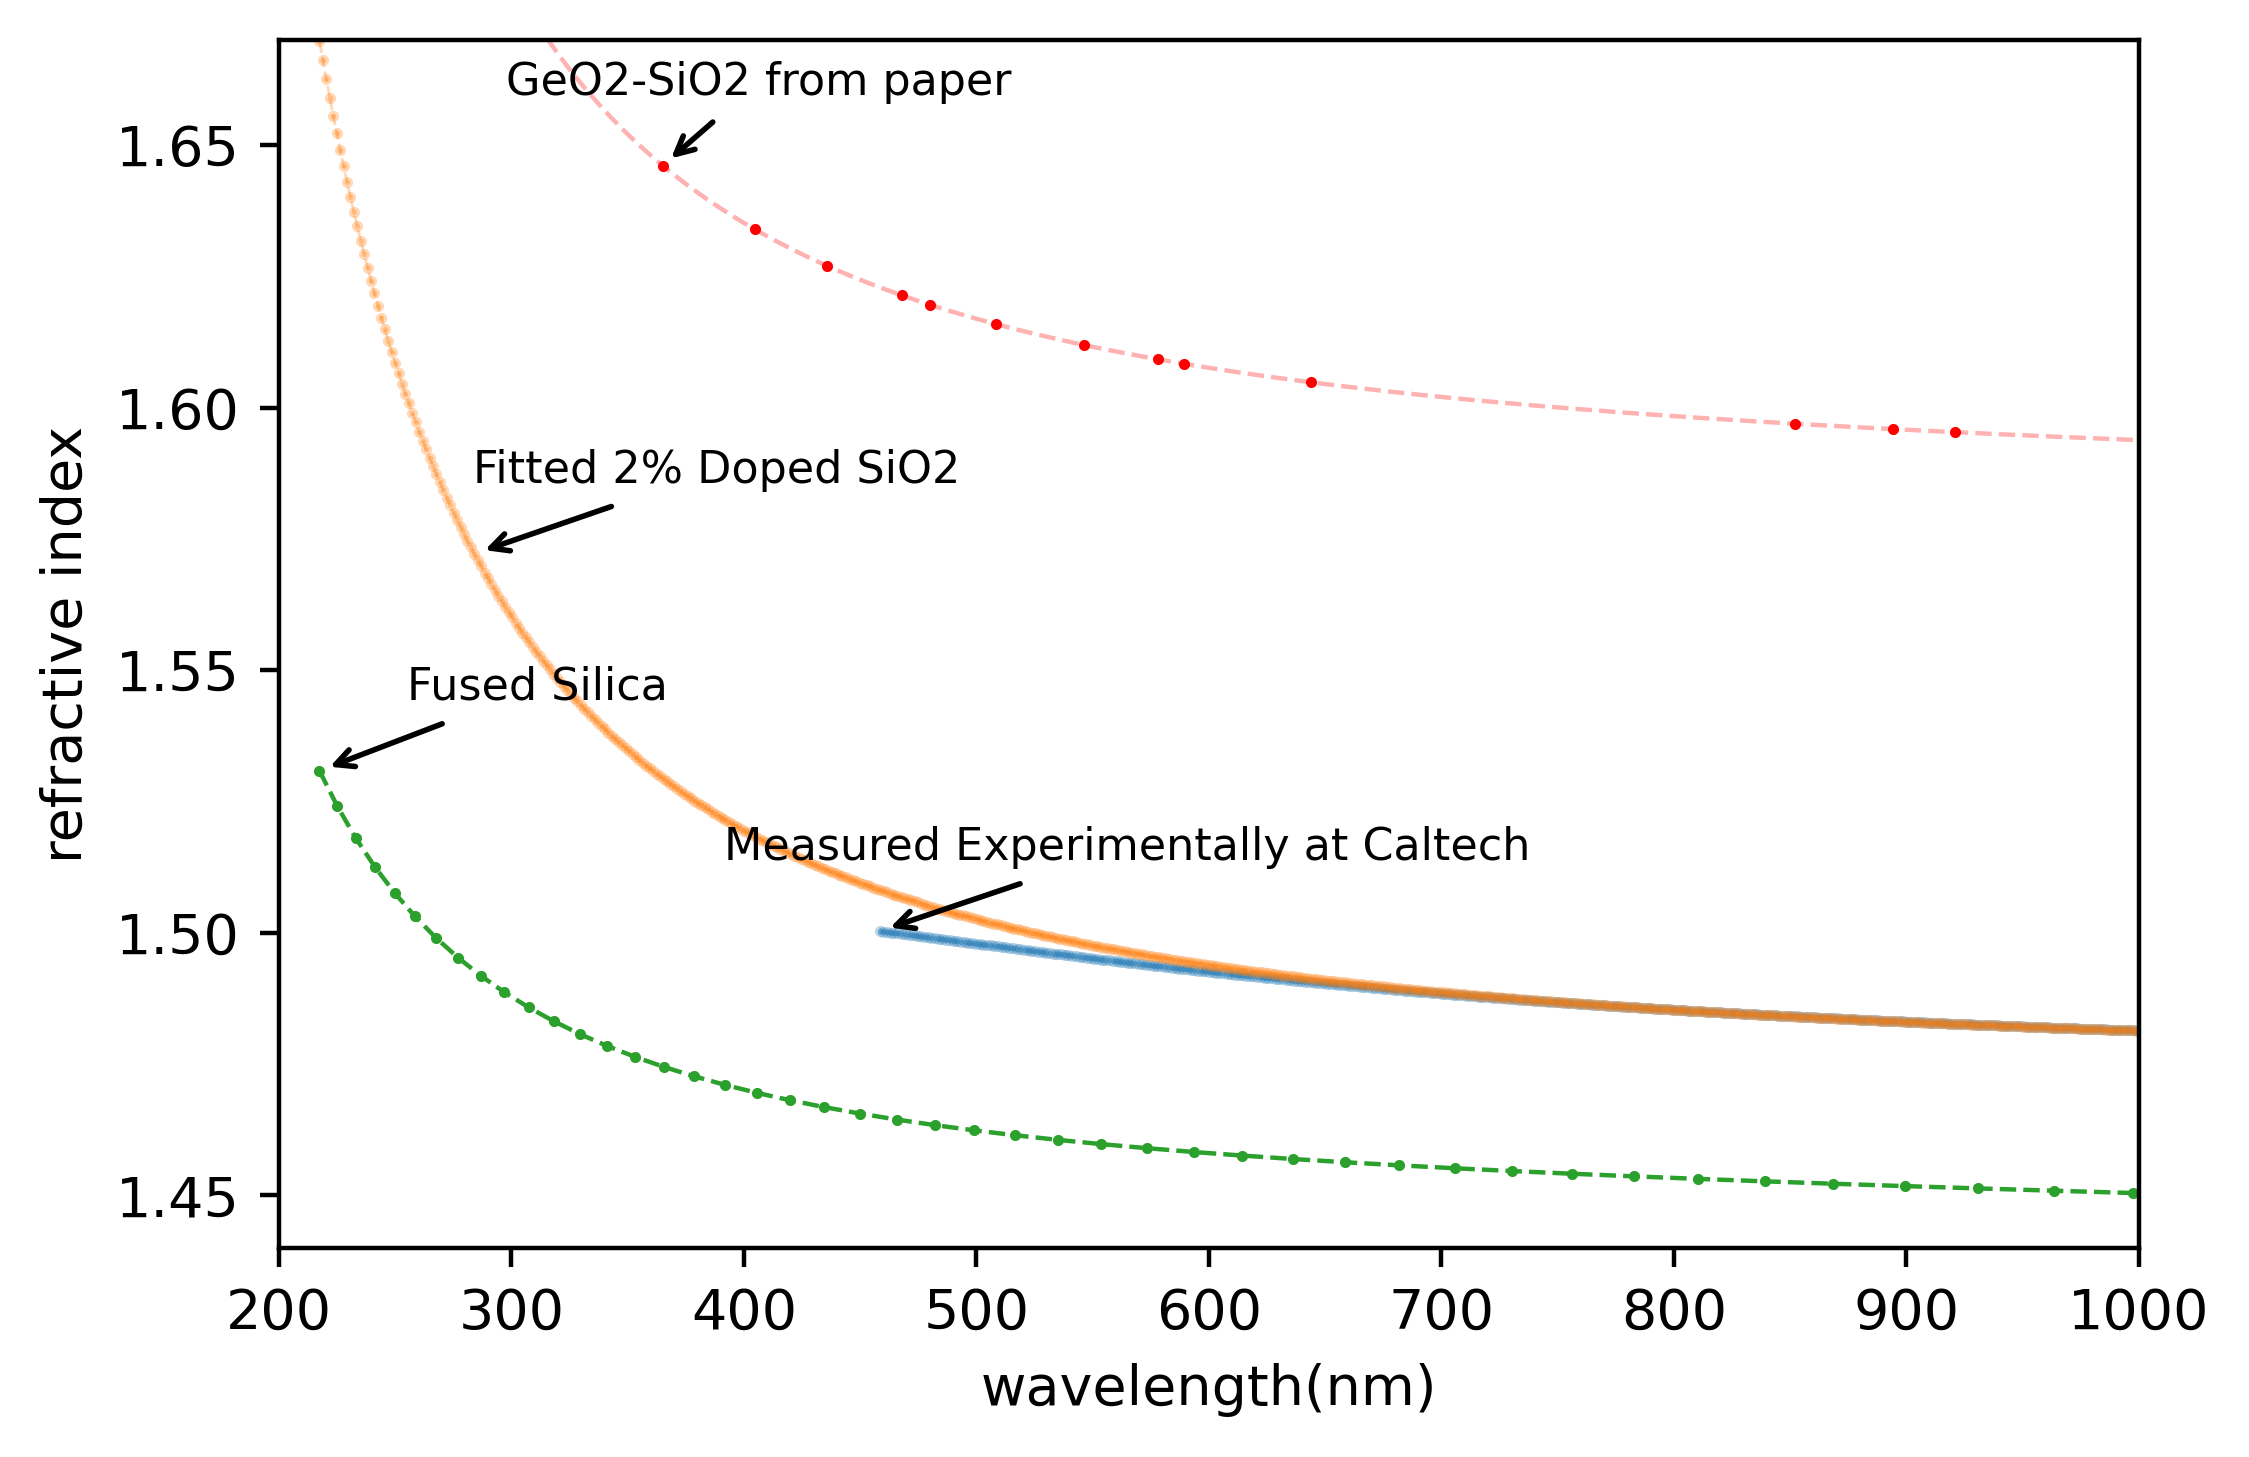

In [89]:
# Model to fit
def transition_target_model(w_nm,a,b,c,d,e,f):
    temp = 0 
    w_um = w_nm/1000
    a = np.array([a,b,c])
    l = np.array([d,e,f])
    for i in range(3):
        ram = a[i]*w_um**2/(w_um**2-l[i]**2)
        temp += ram
    #result  = np.sqrt(temp+1)
    return temp

def target_model(w_nm,a,b,c,d,e,f):
    temp = 0 
    w_um = w_nm/1000
    a = np.array([a,b,c])
    l = np.array([d,e,f])
    for i in range(3):
        ram = a[i]*w_um**2/(w_um**2-l[i]**2)
        temp += ram
    result  = np.sqrt(temp+1)
    return result


x = np.linspace(210,max(wavelength2),1000)
xi,xf=180,480
initial_guess = [0.8, 0.7, 0.7, 0.06, 0.15396605, 0.11841931 * 100]
popt, pcov = curve_fit(transition_target_model, wavelength2[xi:xf], refractive_index2[xi:xf]**2-1, p0=initial_guess, maxfev=1000000)
n_fitted = target_model(x, *popt)

#Plot them
plt.figure(dpi=400)
plt.plot(wavelength2, refractive_index2, '--o', alpha=0.3, linewidth=1,markersize=1,label='Raw')
plt.plot(x, n_fitted, '--o', label='Fitted', alpha=0.3, linewidth=0.5,markersize=1)
###Group 2
plt.plot(wavelength1, refractive_index1, '--o', label='Fused Silica', linewidth=0.8,markersize=1)
plt.plot(lambda_array*1000, n_array, 'o', label='GeO2-SiO2 paper', markersize=1,color = 'red')
plt.plot(w_nm_test,paper_model(w_nm_test),'--',alpha = 0.3, linewidth = 0.8,color = 'red')
# Adding arrows and labels
points = [
    #{"x": wavelength2[0], "y": refractive_index2[0], "text": "Raw 2% Doped SiO2", "xytext": (wavelength2[0] + 150, refractive_index2[0] + 0.02)},
    {"x": x[50], "y": n_fitted[50], "text": "Fitted 2% Doped SiO2", "xytext": (w_nm_test[50] + 75, n_fitted[50] + 0.02)},
    {"x": wavelength1[0], "y": refractive_index1[0], "text": "Fused Silica", "xytext": (wavelength1[0] + 150, refractive_index1[0] + 0.02)},
    {"x": lambda_array[0] * 1000, "y": n_array[0], "text": "GeO2-SiO2 from paper", "xytext": (lambda_array[0] * 1000 + 150, n_array[0] + 0.02)},
    {"x": wavelength2[0] , "y": refractive_index2[0], "text": "Measured Experimentally at Caltech", "xytext": (wavelength2[0]  + 280, refractive_index2[0] + 0.02)}
]
for point in points:
    plt.annotate(point["text"], xy=(point["x"], point["y"]), xytext=point["xytext"],
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=8, color='black', horizontalalignment='right', verticalalignment='top')



    
plt.xlim(200,1000)
plt.ylim(1.44,1.67)
plt.xlabel('wavelength(nm)')
plt.ylabel('refractive index')
#plt.legend()

In [4]:
data_to_save = np.column_stack((w_nm_test, n_fitted))
np.savetxt(r'D:\Caltech\Simulation\HY_comsol_simulation\waveguide_for_photogalvanic\material\Fitted 2%_doped(Cauchy Model).txt', data_to_save, fmt='%.8f', delimiter='\t')
